In [1]:
from scipy.fft import fft, fftfreq
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [2]:
dat = np.fromfile("test", dtype="uint8")

In [3]:
floats = dat[0::].astype(float)

In [4]:
normalized = (floats[0::] - 127.4) / 256

In [5]:
iqdata = dat[0::2] + 1j*dat[1::2]

In [6]:
iqdata

array([104.+102.j, 134.+189.j,  52. +51.j, ...,  76.+187.j, 128.+153.j,
       153. +59.j])

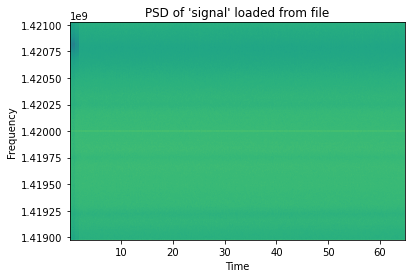

In [7]:
plt.specgram(iqdata, NFFT=4096, Fs=2048000, scale='dB', mode='psd', Fc=1420000000)
plt.title("PSD of 'signal' loaded from file")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()  # if you've done this right, you should see a fun surprise here!

In [8]:
fftdata = fft(iqdata[1:4096])

In [13]:
conjdata = np.conj(fftdata)

/home/evan/anaconda3/envs/radiotest/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


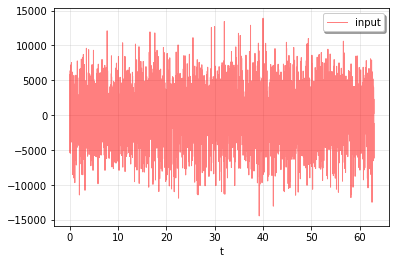

In [17]:
t = np.linspace(0, 63, 4094, endpoint=False)
plt.plot(t, conjdata[1:], 'r', alpha=0.5, linewidth=1, label='input')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

In [9]:
t = np.linspace(0, 1, 5000, endpoint=False)
u = (np.cos(2*np.pi*4*t) + 0.6*np.sin(2*np.pi*40*t) + 0.5*np.cos(2*np.pi*80*t))

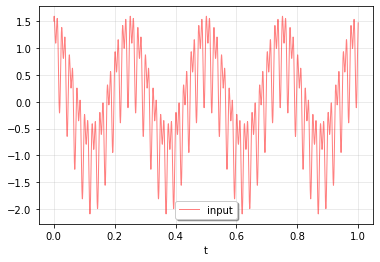

In [10]:
plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()